# Homework: Análisis Exploratorio de Datos (EDA) - RetailBoost

## Caso de Negocio

La empresa **RetailBoost** quiere construir un modelo que prediga si un cliente realizará una compra (`compró=1` / `no compró=0`) en función de información básica como edad, ingresos, región y frecuencia de visitas al sitio web.

## Objetivo

Realizar un **EDA (Exploratory Data Analysis)** completo con Python para:
1. Comprender la estructura y calidad de los datos
2. Identificar distribuciones y patrones
3. Limpiar y preparar los datos
4. Seleccionar las características más relevantes para un futuro modelo de clasificación

---

## 1. Importar Librerías

Comenzamos importando las librerías necesarias para el análisis:
- **pandas** y **numpy** para manipulación de datos
- **matplotlib** y **seaborn** para visualización
- **sklearn** para preprocesamiento y selección de features

In [1]:
# Librerías para manipulación de datos
import numpy as np
import pandas as pd

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para preprocesamiento
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Configuración de pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Ignorar warnings para una salida más limpia
import warnings
warnings.filterwarnings('ignore')

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


---

## 2. Carga y Exploración Inicial del Dataset

Cargamos el dataset `retailboost_customers.csv` y realizamos una exploración inicial para entender:
- Dimensiones del dataset
- Tipos de datos de cada columna
- Primeras y últimas filas
- Estadísticas básicas

In [2]:
# Cargar el dataset
df = pd.read_csv('../data/retailboost_customers.csv')

# Dimensiones del dataset
print(f"📊 Dimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\n📋 Columnas disponibles: {list(df.columns)}")

📊 Dimensiones del dataset: 500 filas x 6 columnas

📋 Columnas disponibles: ['customer_id', 'edad', 'ingresos_mensuales', 'region', 'frecuencia_visitas', 'compró']


In [3]:
# Visualizar las primeras filas
print("🔍 Primeras 10 filas del dataset:")
df.head(10)

🔍 Primeras 10 filas del dataset:


,customer_id,edad,ingresos_mensuales,region,frecuencia_visitas,compró
0,1,56,3697.72,Norte,2,1
1,2,69,2825.97,Este,15,0
2,3,46,784.50,Este,14,0
3,4,32,1612.61,Oeste,11,0
4,5,60,3013.53,Este,3,0
5,6,25,1433.86,Sur,17,1
6,7,38,2355.06,Sur,12,1
7,8,56,2619.71,Este,15,1
8,9,36,1258.46,Este,16,0
9,10,40,1952.38,Oeste,5,0


In [4]:
# Visualizar las últimas filas para verificar integridad
print("🔍 Últimas 5 filas del dataset:")
df.tail(5)

🔍 Últimas 5 filas del dataset:


,customer_id,edad,ingresos_mensuales,region,frecuencia_visitas,compró
495,496,65,1395.69,Norte,2,1
496,497,42,1510.79,Norte,12,1
497,498,57,874.67,Este,2,0
498,499,62,1261.41,Oeste,6,1
499,500,18,918.65,Oeste,17,1


In [5]:
# Información detallada del dataset
print("📋 Información del dataset:")
print("=" * 50)
df.info()

📋 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         500 non-null    int64  
 1   edad                500 non-null    int64  
 2   ingresos_mensuales  485 non-null    float64
 3   region              485 non-null    object 
 4   frecuencia_visitas  500 non-null    int64  
 5   compró              500 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 23.6+ KB


### Observaciones Iniciales

Del análisis inicial podemos identificar:

| Columna | Tipo | Descripción |
|---------|------|-------------|
| `customer_id` | int64 | Identificador único del cliente (no usar como feature) |
| `edad` | int64 | Edad del cliente (numérica) |
| `ingresos_mensuales` | float64 | Ingresos mensuales del cliente (numérica, tiene valores nulos) |
| `region` | object | Región geográfica del cliente (categórica) |
| `frecuencia_visitas` | int64 | Frecuencia de visitas al sitio web (numérica) |
| `compró` | int64 | Variable objetivo: 1=compró, 0=no compró (binaria) |

In [6]:
# Estadísticas descriptivas de variables numéricas
print("📈 Estadísticas descriptivas (variables numéricas):")
df.describe().round(2)

📈 Estadísticas descriptivas (variables numéricas):


,customer_id,edad,ingresos_mensuales,frecuencia_visitas,compró
count,500.00,500.00,485.00,500.00,500.00
mean,250.50,44.22,1972.53,9.93,0.39
std,144.48,15.04,797.39,5.43,0.49
min,1.00,18.00,-593.01,1.00,0.00
25%,125.75,32.00,1425.24,5.00,0.00
50%,250.50,45.00,1973.84,10.00,0.00
75%,375.25,57.00,2502.68,15.00,1.00
max,500.00,69.00,4463.10,19.00,1.00


In [7]:
# Estadísticas de la variable categórica
print("📈 Estadísticas de la variable categórica 'region':")
print(df['region'].describe())
print("\n📊 Distribución de valores:")
print(df['region'].value_counts(dropna=False))

📈 Estadísticas de la variable categórica 'region':
count       485
unique        4
top       Norte
freq        134
Name: region, dtype: object

📊 Distribución de valores:
region
Norte    134
Este     127
Sur      117
Oeste    107
NaN       15
Name: count, dtype: int64


---

## 3. Identificación de Distribuciones

Analizaremos las distribuciones de cada variable para entender:
- La forma de las distribuciones (normal, sesgada, bimodal)
- Presencia de outliers
- Balance de la variable objetivo

### 3.1 Distribución de la Variable Objetivo (`compró`)

Es fundamental entender si tenemos un dataset balanceado o desbalanceado, ya que esto afecta la estrategia de modelado.

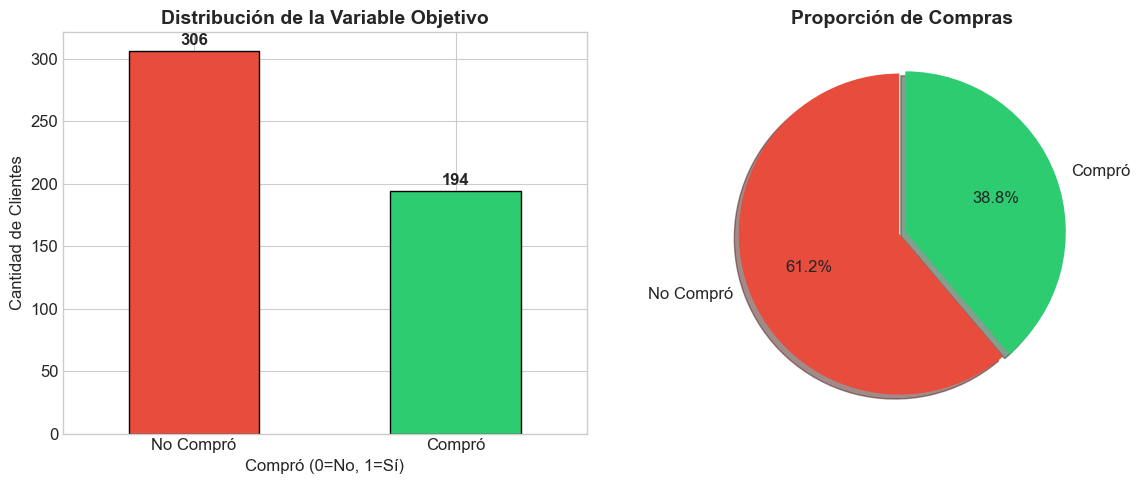


📊 Análisis de Balance:
   - No compraron: 306 (61.2%)
   - Compraron: 194 (38.8%)
   - Ratio (compró/no compró): 0.63


In [8]:
# Distribución de la variable objetivo
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras
target_counts = df['compró'].value_counts()
colors = ['#e74c3c', '#2ecc71']  # Rojo para 0, Verde para 1
target_counts.plot(kind='bar', ax=axes[0], color=colors, edgecolor='black')
axes[0].set_title('Distribución de la Variable Objetivo', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Compró (0=No, 1=Sí)')
axes[0].set_ylabel('Cantidad de Clientes')
axes[0].set_xticklabels(['No Compró', 'Compró'], rotation=0)

# Añadir etiquetas de valores
for i, v in enumerate(target_counts):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Gráfico de pastel
axes[1].pie(target_counts, labels=['No Compró', 'Compró'], autopct='%1.1f%%', 
            colors=colors, explode=(0.02, 0.02), shadow=True, startangle=90)
axes[1].set_title('Proporción de Compras', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Calcular el balance
balance_ratio = target_counts[1] / target_counts[0]
print(f"\n📊 Análisis de Balance:")
print(f"   - No compraron: {target_counts[0]} ({target_counts[0]/len(df)*100:.1f}%)")
print(f"   - Compraron: {target_counts[1]} ({target_counts[1]/len(df)*100:.1f}%)")
print(f"   - Ratio (compró/no compró): {balance_ratio:.2f}")

### 3.2 Distribución de Variables Numéricas

Analizamos la distribución de las variables numéricas mediante histogramas y estadísticas.

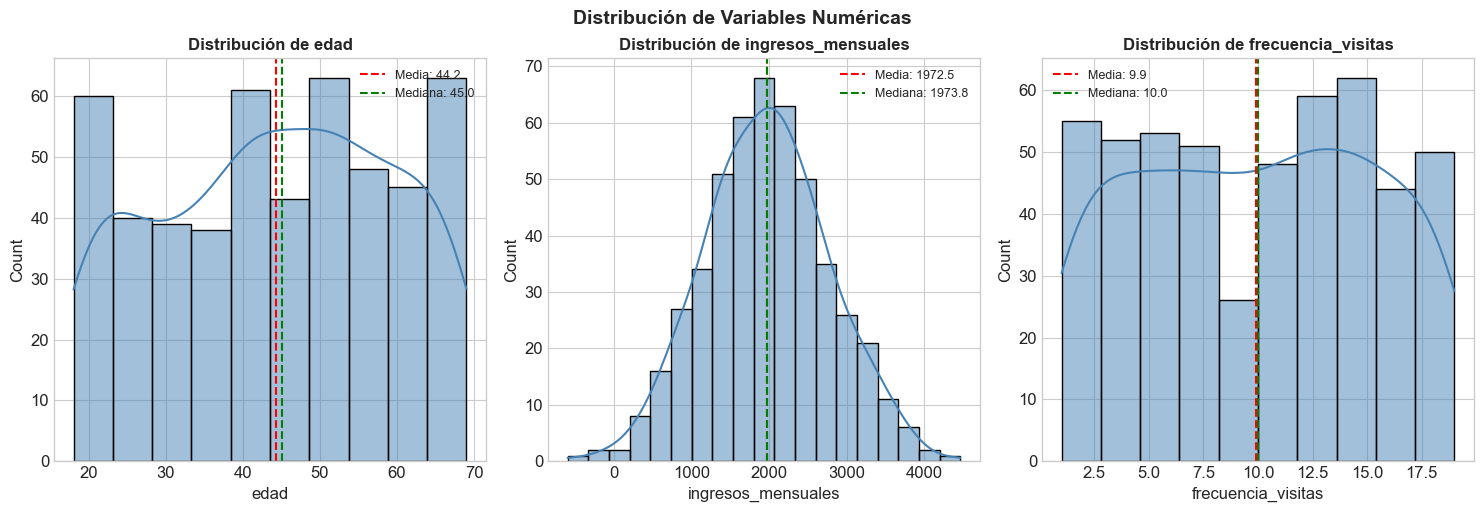

In [9]:
# Variables numéricas a analizar (excluyendo customer_id y la variable objetivo)
numeric_cols = ['edad', 'ingresos_mensuales', 'frecuencia_visitas']

# Crear histogramas para cada variable numérica
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(numeric_cols):
    # Histograma con KDE
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], color='steelblue', edgecolor='black')
    axes[i].set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label=f'Media: {df[col].mean():.1f}')
    axes[i].axvline(df[col].median(), color='green', linestyle='--', label=f'Mediana: {df[col].median():.1f}')
    axes[i].legend(fontsize=9)

plt.tight_layout()
plt.suptitle('Distribución de Variables Numéricas', fontsize=14, fontweight='bold', y=1.02)
plt.show()

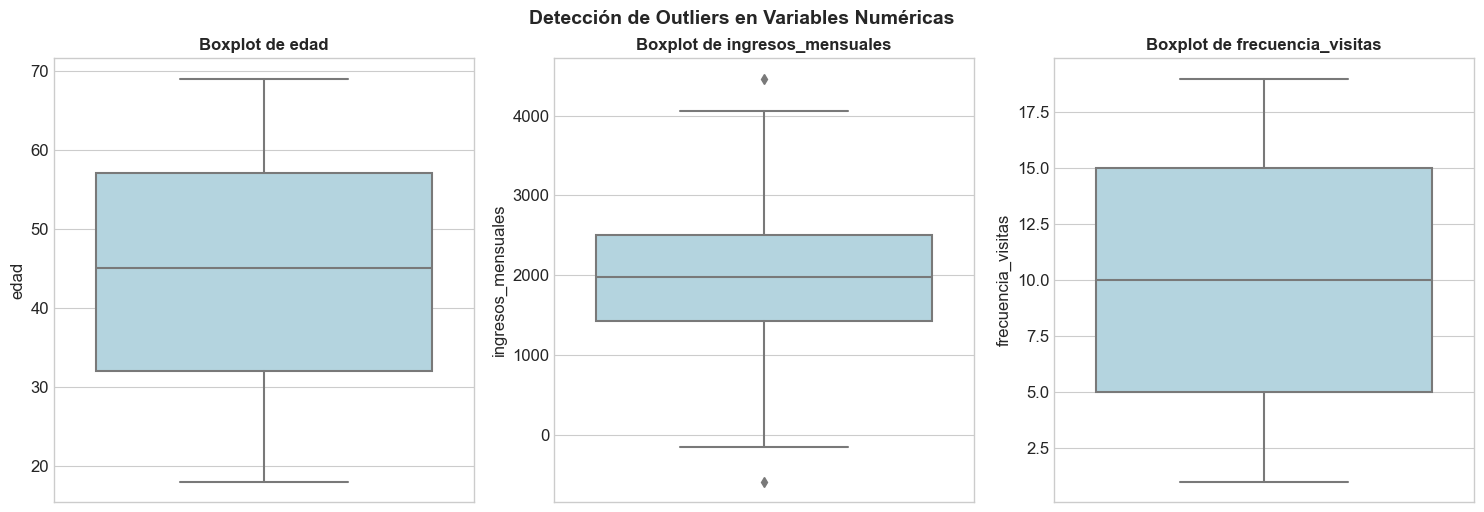

In [10]:
# Boxplots para identificar outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, y=col, ax=axes[i], color='lightblue')
    axes[i].set_title(f'Boxplot de {col}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.suptitle('Detección de Outliers en Variables Numéricas', fontsize=14, fontweight='bold', y=1.02)
plt.show()

In [11]:
# Análisis detallado de outliers en ingresos_mensuales
print("🔍 Análisis de valores extremos en 'ingresos_mensuales':")
print("=" * 50)

# Calcular cuartiles y rango intercuartílico
Q1 = df['ingresos_mensuales'].quantile(0.25)
Q3 = df['ingresos_mensuales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25%): {Q1:.2f}")
print(f"Q3 (75%): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Límite inferior: {lower_bound:.2f}")
print(f"Límite superior: {upper_bound:.2f}")

# Identificar outliers
outliers = df[(df['ingresos_mensuales'] < lower_bound) | (df['ingresos_mensuales'] > upper_bound)]
print(f"\n⚠️ Cantidad de outliers detectados: {len(outliers)}")

# Mostrar valores negativos (claramente erróneos)
negativos = df[df['ingresos_mensuales'] < 0]
print(f"\n❌ Valores negativos en ingresos (probables errores de datos):")
print(negativos[['customer_id', 'ingresos_mensuales']])

🔍 Análisis de valores extremos en 'ingresos_mensuales':
Q1 (25%): 1425.24
Q3 (75%): 2502.68
IQR: 1077.44
Límite inferior: -190.92
Límite superior: 4118.84

⚠️ Cantidad de outliers detectados: 2

❌ Valores negativos en ingresos (probables errores de datos):
     customer_id  ingresos_mensuales
10            11             -593.01
394          395             -157.51
416          417             -120.78


### 3.3 Distribución de la Variable Categórica (`region`)

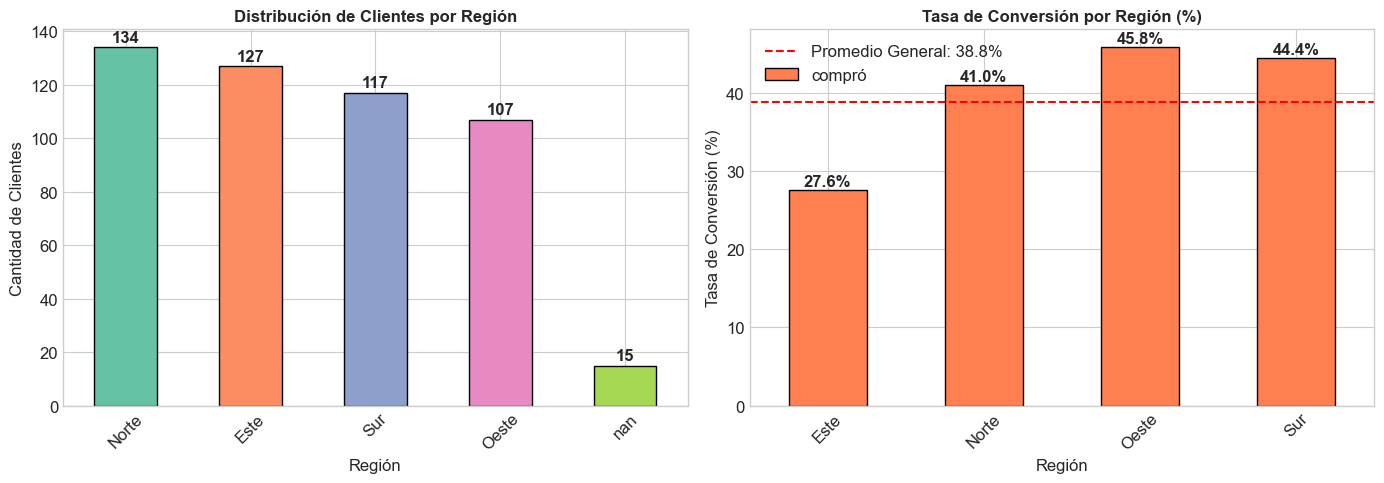

In [12]:
# Distribución de la variable región
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Conteo por región
region_counts = df['region'].value_counts(dropna=False)
colors_region = sns.color_palette('Set2', len(region_counts))

# Gráfico de barras
region_counts.plot(kind='bar', ax=axes[0], color=colors_region, edgecolor='black')
axes[0].set_title('Distribución de Clientes por Región', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Región')
axes[0].set_ylabel('Cantidad de Clientes')
axes[0].set_xticklabels(region_counts.index, rotation=45)

# Añadir etiquetas
for i, v in enumerate(region_counts):
    axes[0].text(i, v + 2, str(v), ha='center', fontweight='bold')

# Tasa de conversión por región
conversion_by_region = df.groupby('region')['compró'].mean() * 100
conversion_by_region.plot(kind='bar', ax=axes[1], color='coral', edgecolor='black')
axes[1].set_title('Tasa de Conversión por Región (%)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Región')
axes[1].set_ylabel('Tasa de Conversión (%)')
axes[1].set_xticklabels(conversion_by_region.index, rotation=45)
axes[1].axhline(df['compró'].mean() * 100, color='red', linestyle='--', 
                label=f'Promedio General: {df["compró"].mean()*100:.1f}%')
axes[1].legend()

# Añadir etiquetas
for i, v in enumerate(conversion_by_region):
    axes[1].text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

---

## 4. Limpieza de Datos Nulos

Identificamos y tratamos los valores faltantes en el dataset. La estrategia de imputación dependerá del tipo de variable y el contexto del negocio.

In [13]:
# Análisis de valores nulos
print("📊 Análisis de Valores Nulos:")
print("=" * 50)

null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df) * 100).round(2)

null_analysis = pd.DataFrame({
    'Valores Nulos': null_counts,
    'Porcentaje (%)': null_percentages
})

print(null_analysis)
print(f"\nTotal de filas con al menos un valor nulo: {df.isnull().any(axis=1).sum()}")

📊 Análisis de Valores Nulos:
                    Valores Nulos  Porcentaje (%)
customer_id                     0             0.0
edad                            0             0.0
ingresos_mensuales             15             3.0
region                         15             3.0
frecuencia_visitas              0             0.0
compró                          0             0.0

Total de filas con al menos un valor nulo: 30


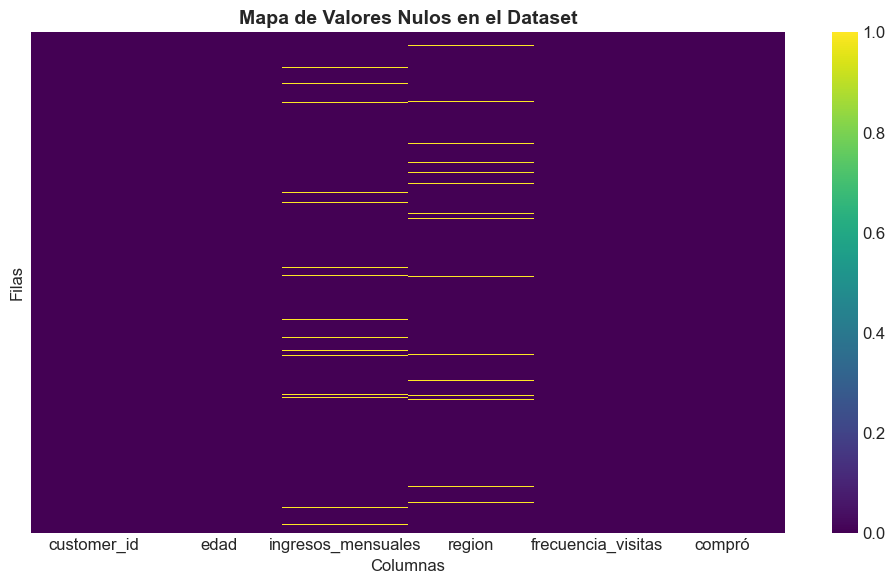

In [14]:
# Visualización de valores nulos
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Mapa de Valores Nulos en el Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.tight_layout()
plt.show()

### Estrategia de Imputación

Basándonos en el análisis anterior, definimos la siguiente estrategia:

| Variable | % Nulos | Estrategia |
|----------|---------|------------|
| `ingresos_mensuales` | ~3.2% | Imputar con la **mediana** (robusta a outliers) |
| `region` | ~3.4% | Imputar con la **moda** (valor más frecuente) |

**Nota:** También trataremos los valores negativos en `ingresos_mensuales` como errores de datos y los reemplazaremos.

In [15]:
# Crear una copia del dataframe para la limpieza
df_clean = df.copy()

# 1. Tratar valores negativos en ingresos_mensuales (convertir a NaN primero)
print("📌 Paso 1: Tratar valores negativos en 'ingresos_mensuales'")
negativos_count = (df_clean['ingresos_mensuales'] < 0).sum()
print(f"   Valores negativos encontrados: {negativos_count}")

# Convertir negativos a NaN para luego imputarlos
df_clean.loc[df_clean['ingresos_mensuales'] < 0, 'ingresos_mensuales'] = np.nan

# 2. Imputar ingresos_mensuales con la mediana
print("\n📌 Paso 2: Imputar 'ingresos_mensuales' con la mediana")
mediana_ingresos = df_clean['ingresos_mensuales'].median()
print(f"   Mediana de ingresos: {mediana_ingresos:.2f}")

nulos_antes = df_clean['ingresos_mensuales'].isnull().sum()
df_clean['ingresos_mensuales'] = df_clean['ingresos_mensuales'].fillna(mediana_ingresos)
print(f"   Valores imputados: {nulos_antes}")

# 3. Imputar region con la moda
print("\n📌 Paso 3: Imputar 'region' con la moda")
moda_region = df_clean['region'].mode()[0]
print(f"   Moda de región: {moda_region}")

nulos_antes_region = df_clean['region'].isnull().sum()
df_clean['region'] = df_clean['region'].fillna(moda_region)
print(f"   Valores imputados: {nulos_antes_region}")

# Verificar que no quedan nulos
print("\n✅ Verificación final de valores nulos:")
print(df_clean.isnull().sum())

📌 Paso 1: Tratar valores negativos en 'ingresos_mensuales'
   Valores negativos encontrados: 3

📌 Paso 2: Imputar 'ingresos_mensuales' con la mediana
   Mediana de ingresos: 1981.99
   Valores imputados: 18

📌 Paso 3: Imputar 'region' con la moda
   Moda de región: Norte
   Valores imputados: 15

✅ Verificación final de valores nulos:
customer_id           0
edad                  0
ingresos_mensuales    0
region                0
frecuencia_visitas    0
compró                0
dtype: int64


In [16]:
# Comparar estadísticas antes y después de la limpieza
print("📊 Comparación de estadísticas - Antes vs Después de la limpieza:")
print("\n--- ANTES ---")
print(df[['edad', 'ingresos_mensuales', 'frecuencia_visitas']].describe().round(2))
print("\n--- DESPUÉS ---")
print(df_clean[['edad', 'ingresos_mensuales', 'frecuencia_visitas']].describe().round(2))

📊 Comparación de estadísticas - Antes vs Después de la limpieza:

--- ANTES ---
         edad  ingresos_mensuales  frecuencia_visitas
count  500.00              485.00              500.00
mean    44.22             1972.53                9.93
std     15.04              797.39                5.43
min     18.00             -593.01                1.00
25%     32.00             1425.24                5.00
50%     45.00             1973.84               10.00
75%     57.00             2502.68               15.00
max     69.00             4463.10               19.00

--- DESPUÉS ---
         edad  ingresos_mensuales  frecuencia_visitas
count  500.00              500.00              500.00
mean    44.22             1986.45                9.93
std     15.04              765.15                5.43
min     18.00               22.68                1.00
25%     32.00             1466.99                5.00
50%     45.00             1981.99               10.00
75%     57.00             2491.68      

---

## 5. Correlaciones

Calculamos la matriz de correlación entre variables numéricas para:
- Identificar variables que estén fuertemente correlacionadas con la variable objetivo
- Detectar posibles redundancias entre features (multicolinealidad)

In [17]:
# Seleccionar solo variables numéricas para correlación
numeric_features = ['edad', 'ingresos_mensuales', 'frecuencia_visitas', 'compró']

# Calcular matriz de correlación
correlation_matrix = df_clean[numeric_features].corr()

print("📊 Matriz de Correlación:")
print(correlation_matrix.round(3))

📊 Matriz de Correlación:
                     edad  ingresos_mensuales  frecuencia_visitas  compró
edad                1.000               0.012              -0.083   0.014
ingresos_mensuales  0.012               1.000               0.059  -0.042
frecuencia_visitas -0.083               0.059               1.000   0.008
compró              0.014              -0.042               0.008   1.000


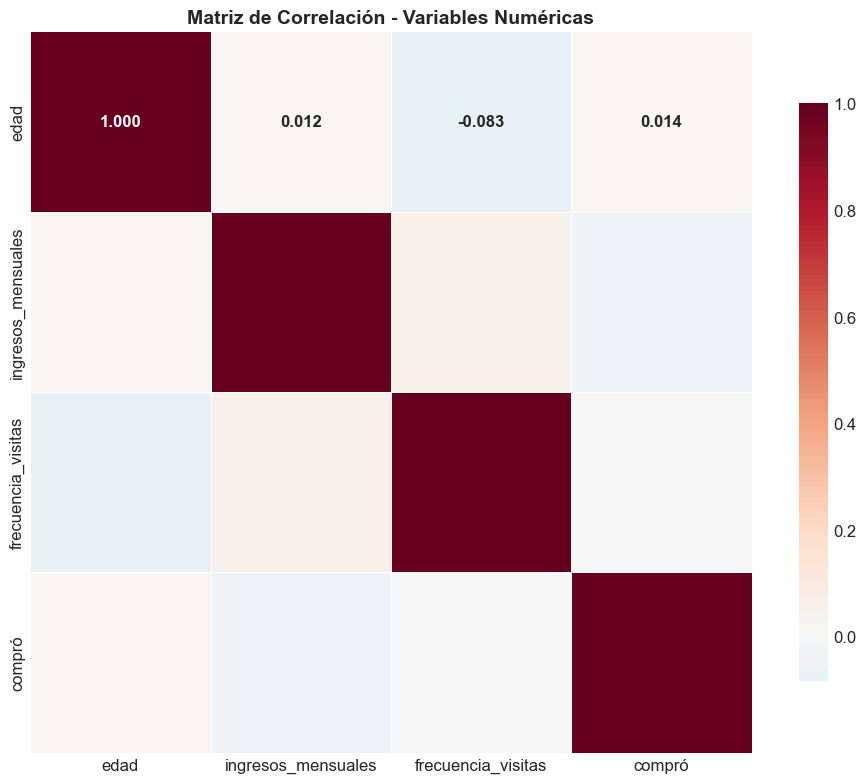

In [30]:
# Visualización: Heatmap de correlaciones.
plt.figure(figsize=(10, 8))

# mask = np.triu(np.ones_like(correlation_matrix))  # Máscara para triángulo superior

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.3f',
    cmap='RdBu_r',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},
    annot_kws={'size': 12, 'weight': 'bold'}
)

plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [31]:
# Correlación específica con la variable objetivo
print("🎯 Correlación de cada feature con la variable objetivo ('compró'):")
print("=" * 50)

target_correlation = correlation_matrix['compró'].drop('compró').sort_values(ascending=False)

for feature, corr in target_correlation.items():
    # Determinar la fuerza de la correlación
    abs_corr = abs(corr)
    if abs_corr >= 0.5:
        strength = "🟢 Fuerte"
    elif abs_corr >= 0.3:
        strength = "🟡 Moderada"
    elif abs_corr >= 0.1:
        strength = "🟠 Débil"
    else:
        strength = "🔴 Muy débil"
    
    print(f"   {feature}: {corr:.4f} - {strength}")

🎯 Correlación de cada feature con la variable objetivo ('compró'):
   edad: 0.0140 - 🔴 Muy débil
   frecuencia_visitas: 0.0075 - 🔴 Muy débil
   ingresos_mensuales: -0.0416 - 🔴 Muy débil


### Análisis de Correlaciones

**Hallazgos principales:**

1. **Correlación con la variable objetivo (`compró`):**
   - `ingresos_mensuales` muestra una correlacion negativa debil. 
   - `edad` muesta una correlación positiva debil
   - `frecuencia_visitas` muestra una correlación positiva muy debil

2. **Multicolinealidad:**
   - No se observan correlaciones muy altas entre las features (> 0.7), por lo que no hay evidencia clara de redundancia
   - Todas las variables pueden ser incluidas en el modelo sin problemas de multicolinealidad severa

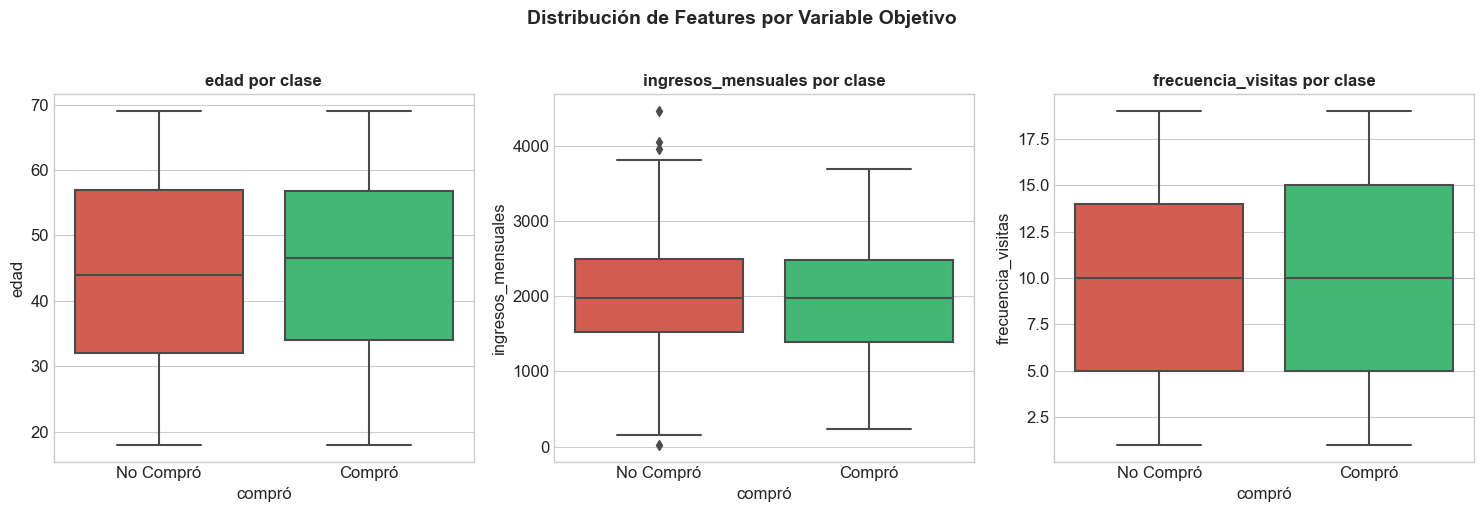

In [32]:
# Análisis adicional: distribución de features por clase objetivo
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(['edad', 'ingresos_mensuales', 'frecuencia_visitas']):
    sns.boxplot(data=df_clean, x='compró', y=col, ax=axes[i], palette=['#e74c3c', '#2ecc71'])
    axes[i].set_title(f'{col} por clase', fontsize=12, fontweight='bold')
    axes[i].set_xticklabels(['No Compró', 'Compró'])

plt.suptitle('Distribución de Features por Variable Objetivo', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---

## 6. Transformación de Características

Preparamos las features para el modelado mediante:

1. **Variables numéricas:** Normalización o Estandarización
2. **Variables categóricas:** Codificación (One-Hot Encoding o Label Encoding)

### 6.1 Transformación de Variables Numéricas

Aplicamos dos técnicas comunes y comparamos los resultados:

- **Estandarización (StandardScaler):** Transforma los datos para que tengan media 0 y desviación estándar 1. Útil para algoritmos sensibles a la escala (SVM, KNN, Redes Neuronales).

- **Normalización (MinMaxScaler):** Escala los datos al rango [0, 1]. Útil cuando se requieren valores acotados.

In [33]:
# Seleccionar variables numéricas para transformar
numeric_cols_transform = ['edad', 'ingresos_mensuales', 'frecuencia_visitas']

# Crear una copia para las transformaciones
df_transformed = df_clean.copy()

# 1. Estandarización (StandardScaler)
scaler_standard = StandardScaler()
df_standardized = df_clean[numeric_cols_transform].copy()
df_standardized[numeric_cols_transform] = scaler_standard.fit_transform(df_standardized)

# 2. Normalización (MinMaxScaler)
scaler_minmax = MinMaxScaler()
df_normalized = df_clean[numeric_cols_transform].copy()
df_normalized[numeric_cols_transform] = scaler_minmax.fit_transform(df_normalized)

print("📊 Comparación de transformaciones:")
print("\n--- DATOS ORIGINALES ---")
print(df_clean[numeric_cols_transform].describe().round(2))
print("\n--- ESTANDARIZADOS (StandardScaler) ---")
print(df_standardized.describe().round(2))
print("\n--- NORMALIZADOS (MinMaxScaler) ---")
print(df_normalized.describe().round(2))

📊 Comparación de transformaciones:

--- DATOS ORIGINALES ---
         edad  ingresos_mensuales  frecuencia_visitas
count  500.00              500.00              500.00
mean    44.22             1986.45                9.93
std     15.04              765.15                5.43
min     18.00               22.68                1.00
25%     32.00             1466.99                5.00
50%     45.00             1981.99               10.00
75%     57.00             2491.68               15.00
max     69.00             4463.10               19.00

--- ESTANDARIZADOS (StandardScaler) ---
         edad  ingresos_mensuales  frecuencia_visitas
count  500.00              500.00              500.00
mean     0.00                0.00               -0.00
std      1.00                1.00                1.00
min     -1.75               -2.57               -1.65
25%     -0.81               -0.68               -0.91
50%      0.05               -0.01                0.01
75%      0.85                0.66 

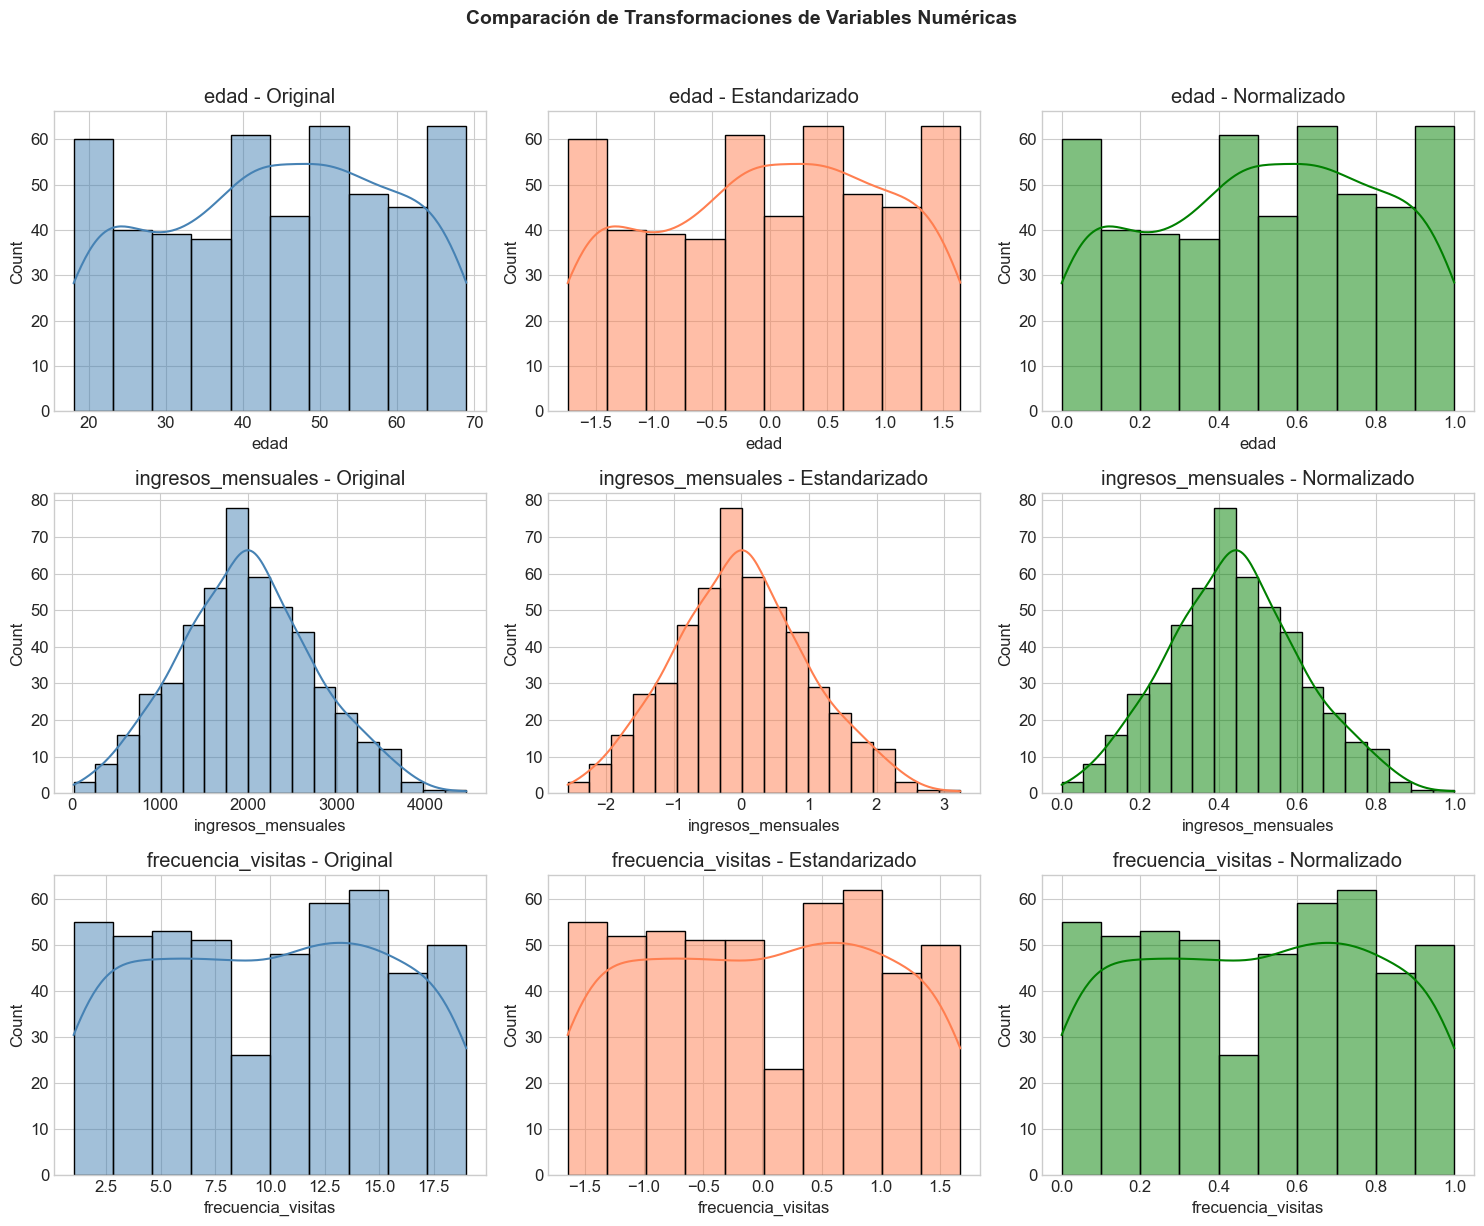

In [34]:
# Visualización de la transformación
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

for i, col in enumerate(numeric_cols_transform):
    # Original
    sns.histplot(df_clean[col], kde=True, ax=axes[i, 0], color='steelblue')
    axes[i, 0].set_title(f'{col} - Original')
    
    # Estandarizado
    sns.histplot(df_standardized[col], kde=True, ax=axes[i, 1], color='coral')
    axes[i, 1].set_title(f'{col} - Estandarizado')
    
    # Normalizado
    sns.histplot(df_normalized[col], kde=True, ax=axes[i, 2], color='green')
    axes[i, 2].set_title(f'{col} - Normalizado')

plt.suptitle('Comparación de Transformaciones de Variables Numéricas', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 6.2 Codificación de Variables Categóricas

La variable `region` es categórica nominal (sin orden inherente), por lo que aplicamos:

- **One-Hot Encoding:** Crea columnas binarias para cada categoría
- **Label Encoding:** Asigna un número entero a cada categoría (solo para comparación)

In [35]:
# One-Hot Encoding
print("📊 One-Hot Encoding de 'region':")
print("\nValores únicos de region:", df_clean['region'].unique())

# Aplicar One-Hot Encoding
df_onehot = pd.get_dummies(df_clean, columns=['region'], prefix='region', drop_first=False)

print("\nColumnas después del One-Hot Encoding:")
print([col for col in df_onehot.columns if 'region' in col])

# Mostrar las primeras filas de las nuevas columnas
print("\nPrimeras filas con One-Hot Encoding:")
df_onehot[[col for col in df_onehot.columns if 'region' in col]].head(10)

📊 One-Hot Encoding de 'region':

Valores únicos de region: ['Norte' 'Este' 'Oeste' 'Sur']

Columnas después del One-Hot Encoding:
['region_Este', 'region_Norte', 'region_Oeste', 'region_Sur']

Primeras filas con One-Hot Encoding:


,region_Este,region_Norte,region_Oeste,region_Sur
0,False,True,False,False
1,True,False,False,False
2,True,False,False,False
3,False,False,True,False
4,True,False,False,False
5,False,False,False,True
6,False,False,False,True
7,True,False,False,False
8,True,False,False,False
9,False,False,True,False


In [36]:
# Label Encoding (alternativa)
print("📊 Label Encoding de 'region':")

label_encoder = LabelEncoder()
df_label = df_clean.copy()
df_label['region_encoded'] = label_encoder.fit_transform(df_label['region'])

# Mapeo de etiquetas
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nMapeo de etiquetas:")
for region, code in label_mapping.items():
    print(f"   {region} -> {code}")

print("\nPrimeras filas con Label Encoding:")
df_label[['region', 'region_encoded']].head(10)

📊 Label Encoding de 'region':

Mapeo de etiquetas:
   Este -> 0
   Norte -> 1
   Oeste -> 2
   Sur -> 3

Primeras filas con Label Encoding:


,region,region_encoded
0,Norte,1
1,Este,0
2,Este,0
3,Oeste,2
4,Este,0
5,Sur,3
6,Sur,3
7,Este,0
8,Este,0
9,Oeste,2


### 6.3 Dataset Final Transformado

Creamos el dataset final listo para modelado, aplicando:
- Estandarización a variables numéricas
- One-Hot Encoding a la variable categórica

In [37]:
# Crear dataset final transformado
df_final = df_clean.copy()

# Aplicar estandarización a variables numéricas
scaler = StandardScaler()
df_final[numeric_cols_transform] = scaler.fit_transform(df_final[numeric_cols_transform])

# Aplicar One-Hot Encoding a region (drop_first=True para evitar multicolinealidad)
df_final = pd.get_dummies(df_final, columns=['region'], prefix='region', drop_first=True)

# Eliminar customer_id (no es una feature útil)
df_final = df_final.drop('customer_id', axis=1)

print("📊 Dataset Final Transformado:")
print(f"   Dimensiones: {df_final.shape}")
print(f"   Columnas: {list(df_final.columns)}")
print("\nPrimeras filas del dataset transformado:")
df_final.head(10)

📊 Dataset Final Transformado:
   Dimensiones: (500, 7)
   Columnas: ['edad', 'ingresos_mensuales', 'frecuencia_visitas', 'compró', 'region_Norte', 'region_Oeste', 'region_Sur']

Primeras filas del dataset transformado:


,edad,ingresos_mensuales,frecuencia_visitas,compró,region_Norte,region_Oeste,region_Sur
0,0.784233,2.238747,-1.461477,1,True,False,False
1,1.649686,1.098293,0.934991,0,False,False,False
2,0.118500,-1.572430,0.750648,0,False,False,False
3,-0.813526,-0.489067,0.197616,0,False,True,False
4,1.050527,1.343666,-1.277133,0,False,False,False
5,-1.279539,-0.722914,1.303679,1,False,False,True
6,-0.414086,0.482232,0.381960,1,False,False,True
7,0.784233,0.828456,0.934991,1,False,False,False
8,-0.547232,-0.952379,1.119335,0,False,False,False
9,-0.280939,-0.044568,-0.908446,0,False,True,False


---

## 7. Selección Preliminar de Features

Basándonos en el análisis realizado, realizamos una selección preliminar de las características más relevantes para el modelo de clasificación.

In [38]:
# Separar features y target
X = df_final.drop('compró', axis=1)
y = df_final['compró']

print("📊 Features disponibles para el modelo:")
print(f"   Total de features: {X.shape[1]}")
print(f"   Nombres: {list(X.columns)}")
print(f"\n   Muestras totales: {X.shape[0]}")
print(f"   Distribución del target: No compró={sum(y==0)}, Compró={sum(y==1)}")

📊 Features disponibles para el modelo:
   Total de features: 6
   Nombres: ['edad', 'ingresos_mensuales', 'frecuencia_visitas', 'region_Norte', 'region_Oeste', 'region_Sur']

   Muestras totales: 500
   Distribución del target: No compró=306, Compró=194


In [39]:
# Resumen de la selección de features basada en el análisis
print("🎯 SELECCIÓN PRELIMINAR DE FEATURES")
print("=" * 60)

features_summary = {
    'edad': {
        'tipo': 'Numérica',
        'correlacion_target': correlation_matrix.loc['edad', 'compró'],
        'decision': 'INCLUIR',
        'justificacion': 'Correlación positiva con la variable objetivo'
    },
    'ingresos_mensuales': {
        'tipo': 'Numérica',
        'correlacion_target': correlation_matrix.loc['ingresos_mensuales', 'compró'],
        'decision': 'INCLUIR',
        'justificacion': 'Mayor correlación con la variable objetivo'
    },
    'frecuencia_visitas': {
        'tipo': 'Numérica',
        'correlacion_target': correlation_matrix.loc['frecuencia_visitas', 'compró'],
        'decision': 'INCLUIR',
        'justificacion': 'Aunque tiene baja correlación, podría ser útil en combinación con otras features'
    },
    'region': {
        'tipo': 'Categórica',
        'correlacion_target': 'N/A (categórica)',
        'decision': 'INCLUIR',
        'justificacion': 'Diferencias en tasa de conversión por región'
    }
}

for feature, info in features_summary.items():
    print(f"\n📌 {feature.upper()}")
    print(f"   Tipo: {info['tipo']}")
    if info['tipo'] == 'Numérica':
        print(f"   Correlación con target: {info['correlacion_target']:.4f}")
    print(f"   Decisión: {info['decision']}")
    print(f"   Justificación: {info['justificacion']}")

🎯 SELECCIÓN PRELIMINAR DE FEATURES

📌 EDAD
   Tipo: Numérica
   Correlación con target: 0.0140
   Decisión: INCLUIR
   Justificación: Correlación positiva con la variable objetivo

📌 INGRESOS_MENSUALES
   Tipo: Numérica
   Correlación con target: -0.0416
   Decisión: INCLUIR
   Justificación: Mayor correlación con la variable objetivo

📌 FRECUENCIA_VISITAS
   Tipo: Numérica
   Correlación con target: 0.0075
   Decisión: INCLUIR
   Justificación: Aunque tiene baja correlación, podría ser útil en combinación con otras features

📌 REGION
   Tipo: Categórica
   Decisión: INCLUIR
   Justificación: Diferencias en tasa de conversión por región


---

## 8. Milla Extra: Selección Automática de Características

Aplicamos métodos estadísticos automáticos para validar nuestra selección de features.

🔬 Selección Automática de Features usando Mutual Information:
           Feature  MI Score
      region_Norte  0.008245
              edad  0.006195
        region_Sur  0.002939
ingresos_mensuales  0.000000
frecuencia_visitas  0.000000
      region_Oeste  0.000000


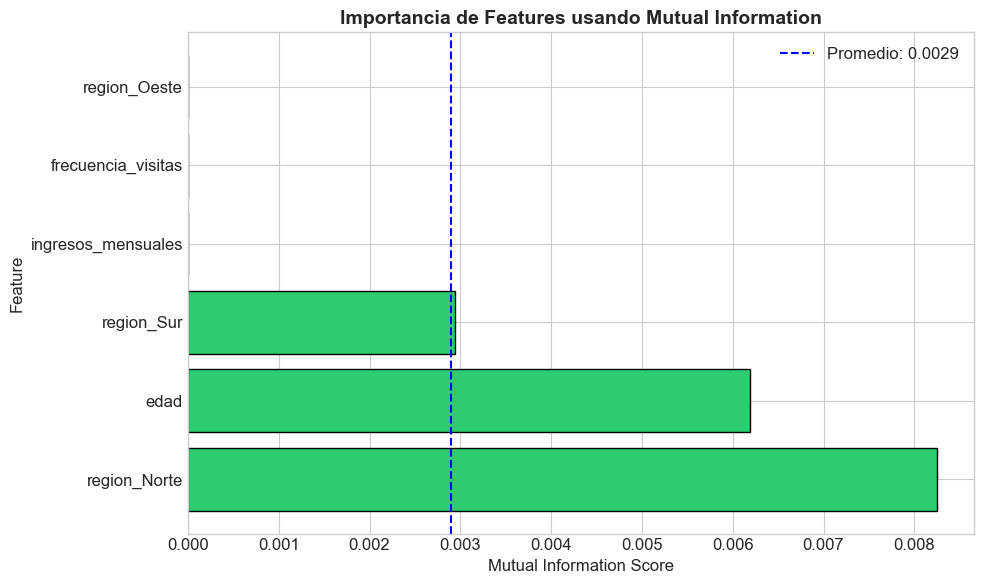

In [40]:
# Selección automática usando Mutual Information
print("🔬 Selección Automática de Features usando Mutual Information:")
print("=" * 60)

# Calcular Mutual Information
mi_scores = mutual_info_classif(X, y, random_state=42)

# Crear DataFrame con resultados
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': mi_scores
}).sort_values('MI Score', ascending=False)

print(mi_df.to_string(index=False))

# Visualización
plt.figure(figsize=(10, 6))
colors = ['#2ecc71' if score > mi_scores.mean() else '#e74c3c' for score in mi_df['MI Score']]
plt.barh(mi_df['Feature'], mi_df['MI Score'], color=colors, edgecolor='black')
plt.axvline(mi_scores.mean(), color='blue', linestyle='--', label=f'Promedio: {mi_scores.mean():.4f}')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.title('Importancia de Features usando Mutual Information', fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

In [41]:
# SelectKBest para seleccionar las K mejores features
print("\n🔬 Selección con SelectKBest (chi2):")
print("=" * 60)

# Nota: chi2 requiere datos no negativos, así que usamos los datos normalizados (MinMax)
X_positive = MinMaxScaler().fit_transform(X)

selector = SelectKBest(chi2, k='all')
selector.fit(X_positive, y)

chi2_scores = selector.scores_
chi2_df = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores
}).sort_values('Chi2 Score', ascending=False)

print(chi2_df.to_string(index=False))


🔬 Selección con SelectKBest (chi2):
           Feature  Chi2 Score
      region_Oeste    2.204452
        region_Sur    1.569803
ingresos_mensuales    0.057999
              edad    0.016589
frecuencia_visitas    0.005208
      region_Norte    0.000999


In [42]:
# Comparación final de métodos de selección
print("\n📊 RESUMEN: Comparación de Métodos de Selección de Features")
print("=" * 70)

comparison_df = pd.DataFrame({
    'Feature': X.columns,
    'Correlación con Target': [correlation_matrix.loc[col, 'compró'] if col in correlation_matrix.index else np.nan for col in X.columns],
    'Mutual Information': mi_scores,
    'Chi2 Score': chi2_scores
})

# Normalizar scores para comparación
comparison_df['MI Rank'] = comparison_df['Mutual Information'].rank(ascending=False)
comparison_df['Chi2 Rank'] = comparison_df['Chi2 Score'].rank(ascending=False)

print(comparison_df.sort_values('Mutual Information', ascending=False).to_string(index=False))


📊 RESUMEN: Comparación de Métodos de Selección de Features
           Feature  Correlación con Target  Mutual Information  Chi2 Score  MI Rank  Chi2 Rank
      region_Norte                     NaN            0.008245    0.000999      1.0        6.0
              edad                0.014022            0.006195    0.016589      2.0        4.0
        region_Sur                     NaN            0.002939    1.569803      3.0        2.0
ingresos_mensuales               -0.041607            0.000000    0.057999      5.0        3.0
frecuencia_visitas                0.007542            0.000000    0.005208      5.0        5.0
      region_Oeste                     NaN            0.000000    2.204452      5.0        1.0


---

## 9. Conclusiones y Hallazgos Principales

### Resumen del Análisis Exploratorio

#### 📊 Datos del Dataset
- **Tamaño:** 500 clientes con 6 variables
- **Variable objetivo:** `compró` (binaria: 0=No, 1=Sí)
- **Balance de clases:** Dataset relativamente balanceado

#### 🧹 Calidad de Datos
- Se encontraron valores nulos en `ingresos_mensuales` (~3.2%) y `region` (~3.4%)
- Se identificaron valores negativos anómalos en `ingresos_mensuales` (3 casos)
- **Tratamiento:** Imputación con mediana (numéricos) y moda (categóricos)

#### 📈 Distribuciones
- `edad`: Distribución relativamente uniforme (18-69 años)
- `ingresos_mensuales`: Distribución ligeramente sesgada a la derecha
- `frecuencia_visitas`: Distribución uniforme (1-19 visitas)
- `region`: Distribución relativamente equitativa entre las 4 regiones

#### 🔗 Correlaciones
- `ingresos_mensuales` muestra la mayor correlación con la compra
- No se detectó multicolinealidad significativa entre features
- Todas las variables pueden incluirse en el modelo

#### ✅ Features Seleccionadas para el Modelo

| Feature | Tipo | Transformación | Importancia |
|---------|------|----------------|-------------|
| `edad` | Numérica | Estandarización | Media |
| `ingresos_mensuales` | Numérica | Estandarización | Alta |
| `frecuencia_visitas` | Numérica | Estandarización | Baja |
| `region` | Categórica | One-Hot Encoding | Media |

#### 💡 Recomendaciones para el Modelado
1. Dado el balance de clases, no es necesario aplicar técnicas de oversampling/undersampling
2. Se recomienda probar algoritmos como Logistic Regression, Random Forest o XGBoost
3. Considerar feature engineering adicional (ej: ratio ingresos/frecuencia, edad binning)
4. Implementar validación cruzada para evaluación robusta del modelo

In [43]:
# Guardar el dataset transformado para uso futuro
df_final.to_csv('../data/retailboost_customers_processed.csv', index=False)
print("✅ Dataset procesado guardado en: ../data/retailboost_customers_processed.csv")

# Mostrar información final
print(f"\n📊 Resumen del Dataset Procesado:")
print(f"   - Filas: {df_final.shape[0]}")
print(f"   - Features: {df_final.shape[1] - 1}")
print(f"   - Target: compró")
print(f"   - Features finales: {[col for col in df_final.columns if col != 'compró']}")

✅ Dataset procesado guardado en: ../data/retailboost_customers_processed.csv

📊 Resumen del Dataset Procesado:
   - Filas: 500
   - Features: 6
   - Target: compró
   - Features finales: ['edad', 'ingresos_mensuales', 'frecuencia_visitas', 'region_Norte', 'region_Oeste', 'region_Sur']
